In [1]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np

In [2]:
#Number of Simulations
num_simulations = 1000
num_days = 252

In [3]:
start = dt.datetime(2017,1,3)
end= dt.datetime(2017,11,20)

In [4]:
prices = web.DataReader('AAPL','yahoo',start,end)['Close']

In [5]:
returns = prices.pct_change()

In [6]:
simulation_df = pd.DataFrame()

In [7]:
last_price = prices[-1]

daily_vol = returns.std()

In [8]:
daily_vol

0.0112409423352645

In [9]:
for x in range(num_simulations):
    count = 0
    price_series = []
    price = last_price * (1+ np.random.normal(0,daily_vol))
    price_series.append(price)
    for y in range(num_days):
        if count==251:
            break
        price = price_series[count]*(1 + np.random.normal(0,daily_vol))
        price_series.append(price)
        count+=1
    simulation_df[x] = price_series

In [10]:
simulation_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,42.840024,42.657326,43.142827,42.828427,42.514547,42.217863,42.103810,42.565144,41.504357,42.256886,...,42.811424,41.649554,42.781568,41.780571,41.766920,41.739793,42.048534,42.888618,43.101681,42.355159
1,42.735358,42.187031,42.820653,42.293677,43.217244,42.480096,42.178764,42.140819,40.595397,41.702478,...,44.353463,40.812495,43.027463,41.287893,41.723477,42.052293,41.316974,42.957143,43.805829,42.598648
2,41.792990,42.790107,42.819281,41.427307,43.332054,42.006655,42.589870,42.574009,40.765959,41.060568,...,44.204816,40.972982,42.897377,42.065459,41.393072,42.125659,41.311425,42.612606,43.018234,42.912602
3,41.106641,42.914071,41.917827,41.204467,43.525710,42.103171,42.230552,43.400215,40.239967,40.717733,...,44.644542,41.354477,42.968533,42.425689,41.320857,41.155411,40.615056,42.233159,43.201445,42.250710
4,41.948085,41.964840,42.316221,41.005624,43.150091,42.430917,41.888777,43.497166,39.783058,41.521479,...,43.661020,41.186016,42.805378,42.311733,41.454727,40.959701,40.487818,41.824327,43.094822,41.657578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,65.229419,35.174029,47.388162,41.643404,57.368364,43.230844,40.931606,50.547953,28.177788,28.747674,...,34.779176,35.959315,48.942103,54.024948,45.860721,37.725505,36.083121,40.734572,41.032420,34.544690
248,65.552780,36.244297,47.542411,41.243580,57.278712,43.886129,41.408153,50.350119,28.531370,29.016442,...,34.196828,35.658053,47.852267,54.066275,45.456391,38.077214,35.890471,39.827880,41.738926,34.452595
249,63.900078,36.473505,47.454471,40.850821,57.214258,43.897462,41.422357,49.572015,27.973914,28.806473,...,34.228024,35.722838,47.942286,53.745142,45.675203,38.071938,36.390350,39.992270,42.539519,34.558221
250,63.481413,36.848724,47.258995,40.529413,57.644541,44.225599,41.252742,49.288470,27.948055,28.613215,...,34.504968,36.003625,48.894343,52.774359,45.405929,37.648790,37.284689,39.181151,41.674546,34.533087


In [11]:
# %matplotlib notebook
# %matplotlib notebook
# import matplotlib.pyplot as plt
# from matplotlib import style
# #style use
# style.use('ggplot')

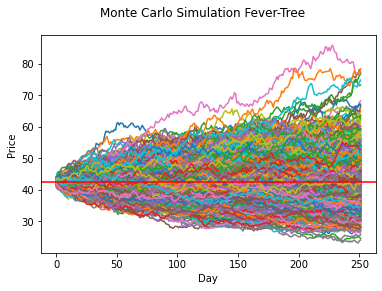

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Monte Carlo Simulation Fever-Tree')
plt.plot(simulation_df)
plt.axhline(y=last_price,color='r',linestyle='-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()